### Variational Quantum Eigensolver (VQE) 

Variational Quantum Eigensolver (VQE) is a hybrid quantum-classical algorithm used to find the ground state energy of a quantum system. 

VQE leverages the variational principle, which states that the ground state energy of a system is the minimum expectation value of the Hamiltonian, and uses a quantum computer to evaluate this expectation value.

VQE is particularly useful in quantum chemistry for finding the ground state energies of molecules, which is a computationally intensive task for classical computers.

Below is an example of implementing VQE using IBM's Qiskit.

In this example, we perform the following steps:

Quantum Phase Estimation

Quantum Phase Estimation (QPE) is a crucial algorithm in quantum computing with wide-ranging applications in chemistry, cryptography, and beyond. It allows us to estimate the phase (or eigenvalue) of an eigenvector of a unitary operator. 

QPE is the backbone of many quantum algorithms, such as Shor's algorithm for factoring and algorithms for solving linear systems.

Below is a step-by-step implementation of the Quantum Phase Estimation algorithm using IBM's Qiskit.

In this example, we perform the following steps:

✅ Hamiltonian Definition: We define the Hamiltonian of the system. Here, we use a simple Hamiltonian H=ZI+IZ+ZZH = ZI + IZ + ZZH=ZI+IZ+ZZ.

✅ Variational Ansatz: We create a quantum circuit for the variational ansatz using the EfficientSU2 circuit from Qiskit's circuit library.

✅ Simulator Initialization: We initialize the AerSimulator to simulate the quantum circuit.

✅ Optimizer Definition: We use the COBYLA optimizer to find the parameters that minimize the expectation value of the Hamiltonian.

✅ Objective Function: We define an objective function that computes the expectation value of the Hamiltonian for given parameters.

✅ Parameter Optimization: We optimize the parameters of the variational ansatz to minimize the objective function.

✅ Results and Visualization: We print the optimized parameters and the corresponding minimum energy. We also visualize the final optimized circuit.

VQE is a powerful technique that bridges quantum and classical computing, enabling us to solve complex problems in quantum chemistry and other fields. By understanding and implementing VQE, we can harness the power of quantum computing to find solutions to challenging computational problems.

Stay tuned for more quantum computing concepts and implementations!

In [46]:
# Import necessary libraries
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.primitives import Estimator
from qiskit.circuit.library import EfficientSU2
from qiskit_algorithms.optimizers import COBYLA
from qiskit.quantum_info import SparsePauliOp, Pauli
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline 

In [33]:
# Define the Hamiltonian of the system
# In this example, we use a simple Hamiltonian: H = ZI + IZ + ZZ
pauli_list = [Pauli('ZI'), Pauli('IZ'), Pauli('ZZ')]
coefficients = [1.0, 1.0, 1.0]
H = SparsePauliOp(pauli_list, coefficients)

In [34]:
# Define a quantum circuit for the variational ansatz
num_qubits = 2
ansatz = EfficientSU2(num_qubits, entanglement='linear')

In [35]:
# Initialize the simulator
simulator = AerSimulator()

In [36]:
# Define the optimizer
optimizer = COBYLA(maxiter=200)

In [37]:
# Function to compute the expectation value of the Hamiltonian
def objective_function(params):
    bound_circuit = ansatz.assign_parameters(params)
    compiled_circuit = transpile(bound_circuit, simulator)
    estimator = Estimator()
    result = estimator.run(compiled_circuit, H).result()
    return np.real(result.values[0])

In [38]:
# Initial parameters
initial_params = np.random.random(ansatz.num_parameters)

In [39]:
# Optimize the parameters to minimize the expectation value of the Hamiltonian
result = optimizer.minimize(objective_function, initial_params)

In [40]:
# Get the optimized parameters and the corresponding minimum energy
optimized_params, minimum_energy = result.x, result.fun

In [41]:
# Print the results
print("Optimized Parameters:", optimized_params)
print("Minimum Energy:", minimum_energy)

Optimized Parameters: [ 2.08108747  1.30087472  0.03777235 -0.0419978   1.21282254  1.6054024
  0.04199909  0.55527747  0.4009233   1.21385007  2.13099163  0.27653605
 -0.01352084  0.88356434  1.91367378  0.62862046]
Minimum Energy: -0.9999999988866363


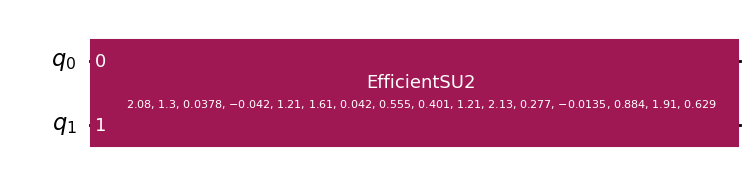

In [47]:
# Visualize the final circuit
optimized_circuit = ansatz.assign_parameters(optimized_params)
optimized_circuit.draw('mpl')
plt.show()